In [7]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
 
 
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
 
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
 
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:

# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.53299796
Validation score: 0.537500
Iteration 2, loss = 1.12470559
Validation score: 0.512500
Iteration 3, loss = 0.90930237
Validation score: 0.562500
Iteration 4, loss = 0.72800767
Validation score: 0.625000
Iteration 5, loss = 0.57364039
Validation score: 0.712500
Iteration 6, loss = 0.45651097
Validation score: 0.737500
Iteration 7, loss = 0.37500710
Validation score: 0.787500
Iteration 8, loss = 0.31223290
Validation score: 0.787500
Iteration 9, loss = 0.25928972
Validation score: 0.800000
Iteration 10, loss = 0.21531230
Validation score: 0.787500
Iteration 11, loss = 0.18151778
Validation score: 0.787500
Iteration 12, loss = 0.15378351
Validation score: 0.787500
Iteration 13, loss = 0.13139475
Validation score: 0.787500
Iteration 14, loss = 0.11341057
Validation score: 0.787500
Iteration 15, loss = 0.09830212
Validation score: 0.800000
Iteration 16, loss = 0.08568843
Validation score: 0.800000
Iteration 17, loss = 0

In [10]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.87      0.90      0.88        67
  Donald Rumsfeld       0.84      0.63      0.72        41
    George W Bush       0.84      0.95      0.89       155
Gerhard Schroeder       0.85      0.65      0.73        34
       Tony Blair       0.85      0.76      0.80        45

         accuracy                           0.85       342
        macro avg       0.85      0.78      0.81       342
     weighted avg       0.85      0.85      0.84       342



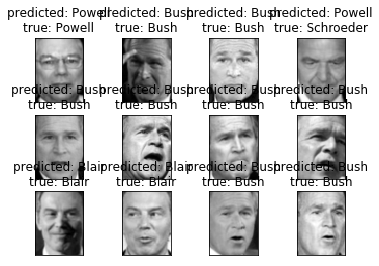

In [11]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)